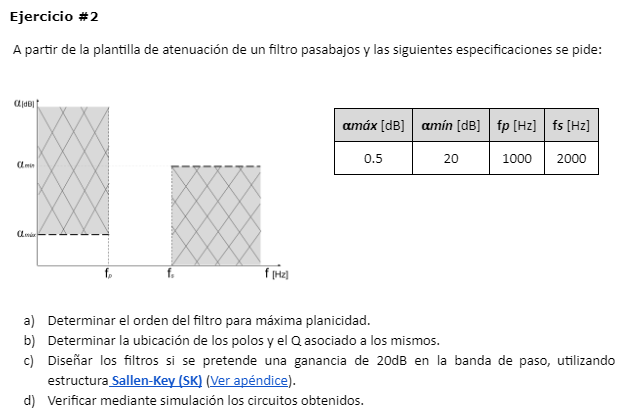

### Diseño de filtro máxima planicidad

$ \Omega_W = 1k Hz $  
$ W_0 = 1  W_s = 2 $  
$ \epsilon = \sqrt{10^{\frac{\alpha_mdB}{10}} - 1} $  
$ \epsilon = \sqrt{10^{\frac{0,5}{10}} - 1} $  
$ \epsilon = 0,349 $  
$ \epsilon^2 = 0,122 $  
$ \alpha_{mindB} = 10 \cdot log(1 + \epsilon^2 \cdot W_{s}^{2n}) $  
$ \alpha_{mindB} = 10 \cdot log(1 + 0,122 \cdot 2^{2n}) $  
$ n = 5 $  $ \alpha_{mindB} = 21 $  
$ |T(jw)|^2 = \frac{1}{1 + \epsilon^2 \cdot w^(2n)} $   


In [1]:
import numpy as np
import math

amax = 0.5
amin = 20

w0 = 1
ws = 2

ep = math.sqrt(10**(amax/10) - 1)

n = np.log((10**(amin/10) - 1)/(ep**2))/(np.log(2)*2)

print(f" epsilon = {ep}, orden = {n} ")

 epsilon = 0.34931140018894796, orden = 4.832092677374252 


### Ubicacion de polos y Q correspondientes
#### Diseño como butter
$ \Omega_{W} = W_B = \epsilon^{\frac{-1}{n}} \cdot W_p' = \epsilon^{\frac{-1}{5}} \cdot 2 \pi \cdot 2000 Hz $  
$ |T(jw))|^2 |w=\frac{s}{j} = \frac{1}{1 + \frac{s}{j}^{2 \cdot 5}} = T(s) \cdot T(-s) $  
$ |T(jw))|^2 |w=\frac{s}{j} = \frac{1}{1 - s^{10}} = T(s) \cdot T(-s) $  

(1, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

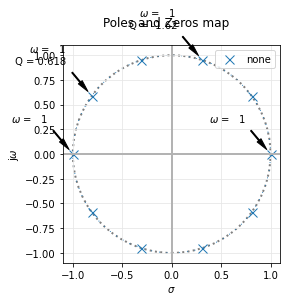

In [3]:
from splane import pzmap, bodePlot
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt

my_tf = TransferFunction([1],[-1,0,0,0,0,0,0,0,0,0,1])

pzmap(my_tf,2)

##### Divido en 3 transferencias, 2 de orden 2 y una de orden 1

$ Q_1 = \frac{1}{2 \cdot cos(\frac{4\pi}{5})} = 0,618 $  
$ Q_2 = \frac{1}{2 \cdot cos(\frac{3\pi}{5})} = 1,618 $   
$ T_1(s) = \frac{W_0^2}{s^2+s \cdot \frac{W_0}{Q_1} + W_0^2} $  
$ T_2(s) = \frac{W_0^2}{s^2+s \cdot \frac{W_0}{Q_2} + W_0^2} $  
$ T_3(s) = \frac{1}{s+1} $  
$ L_1 = Q_1   L_2 = Q_2  C_1 = \frac{1}{Q_1}  C_2 = \frac{1}{Q_2} $  

### Sallen-key
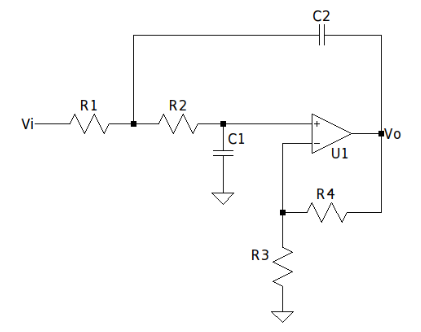
$ T_{SK}(s) = \frac{k \cdot W_0}{s^2 + s \cdot \frac{W_0}{Q} + W_0^2} $  
$ W_0^2 = \frac{1}{R_1 \cdot R_2 \cdot C^2} $  
$ K = 1 + \frac{R_4}{R_3} $  
$ Q = \frac{1}{3 - K} $  

#### Transferencia 1

$ \Omega_Z = R_1 = 1 $  
$ W_{01}^2 = \frac{1}{C^2} $  
$ C = \frac{1}{W_{01}} $  
$ W_{01} = 1 $  $ C = 1 $  
$ Q_1 = 0,618 $  
$ K_1 = 3 - \frac{1}{Q_1} $  
$ K_1 = 3 - \frac{1}{0,618} $  
$ K_1 = 1,381877 $  
$ K_1 = 1 + \frac{R_4}{R_3} $  
$ R_4 = (K_1 - 1) \cdot R_3 $  
$ R_4 = (K_1 - 1) \cdot R_3 $  
$ R_4 = 0,381877 \cdot R_3 $

#### Transferencia 2

$ \Omega_Z = R_1 = 1 $  
$ W_{02}^2 = \frac{1}{C^2} $  
$ C = \frac{1}{W_{02}} $  
$ W_{02} = 1 $  $ C = 1 $  
$ Q_2 = 1,618 $  
$ K_2 = 3 - \frac{1}{Q_2} $  
$ K_2 = 3 - \frac{1}{1,618} $  
$ K_2 = 2,381966 $  
$ K_2 = 1 + \frac{R_4}{R_3} $  
$ R_4 = (K_2 - 1) \cdot R_3 $  
$ R_4 = (K_2 - 1) \cdot R_3 $  
$ R_4 = 1,381966 \cdot R_3 $  

#### Transferencia 3
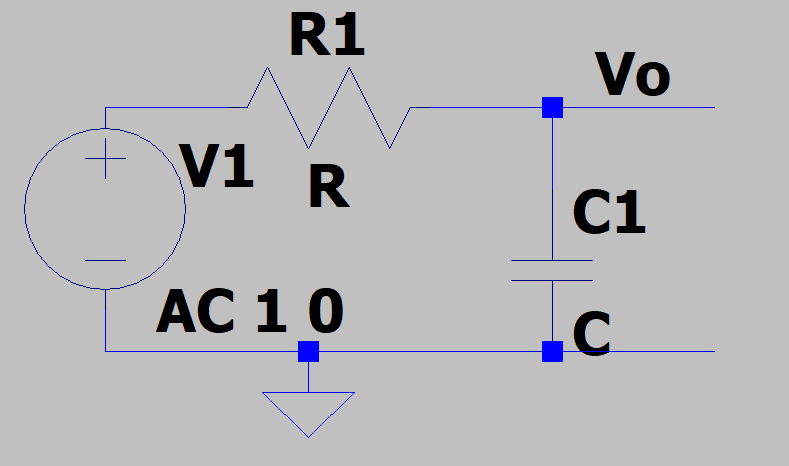
$ T_3(s) = \frac{\frac{1}{s C}}{\frac{1}{s C} + R} $  
$ T_3(s) = \frac{1}{1 + s C R} $    
$ T_3(s) = \frac{\frac{1}{RC}}{s + \frac{1}{RC}} $    
$ W_03 = 1 $  
$ \frac{1}{RC} = 1 $  
$ R = 1 $  $ C = 1 $  
$ T_3(jw)_{s = jw} = \frac{1}{1+jw} $  
$ T_3(jw)_{w = 1} = \frac{1}{1+j} = \frac{1}{\sqrt{2}} \cdot e^{-\frac{\pi}{4}} $  

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

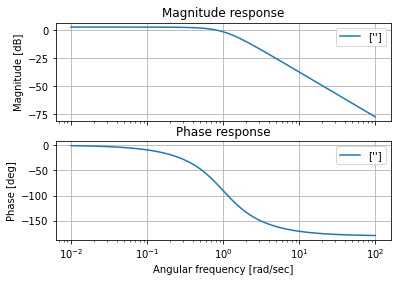

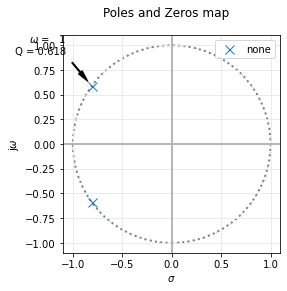

In [18]:
# Transferencia 1

W01 = 1
Q1  = 0.618
K1  = 1.381877

numerador1   = [K1 * W01**2] 
denominador1 = [1 , W01/Q1 , W01**2]

my_tf1 = TransferFunction(numerador1, denominador1)

bodePlot(my_tf1,1)

pzmap(my_tf1,2)

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

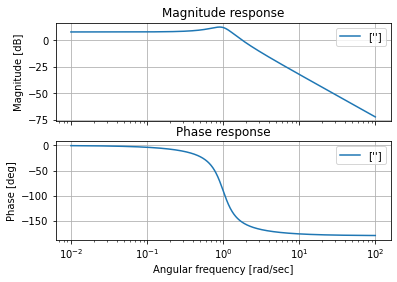

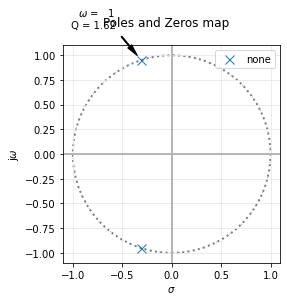

In [19]:
# Transferencia 2

W02 = 1
Q2  = 1.618
K2  = 2.381966

numerador2   = [K2 * W02**2] 
denominador2 = [1 , W02/Q2 , W02**2]

my_tf2 = TransferFunction(numerador2, denominador2)

bodePlot(my_tf2,1)

pzmap(my_tf2,2)

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

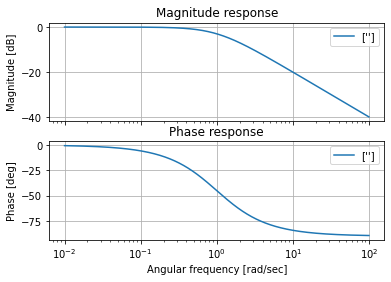

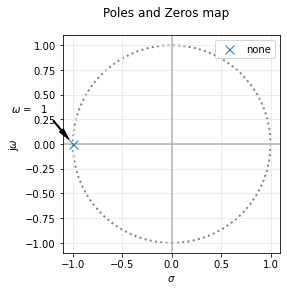

In [20]:
# Transferencia 3

W03 = 1

numerador3   = [W03**2] 
denominador3 = [1 , W03**2]

my_tf3 = TransferFunction(numerador3, denominador3)

bodePlot(my_tf3,1)

pzmap(my_tf3,2)

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

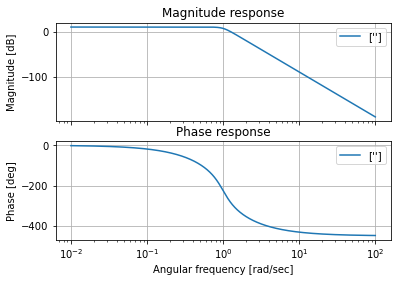

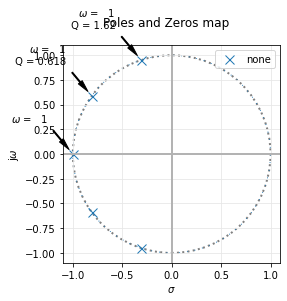

In [38]:
# Transferencia total

numerador = np.polymul(numerador1 , numerador2)
numerador = np.polymul(numerador  , numerador3)

denominador = np.polymul(denominador1 , denominador2)
denominador = np.polymul(denominador  , denominador3)

my_tf = TransferFunction(numerador, denominador)

bodePlot(my_tf,1)

pzmap(my_tf,2)

### Circuito normalizado
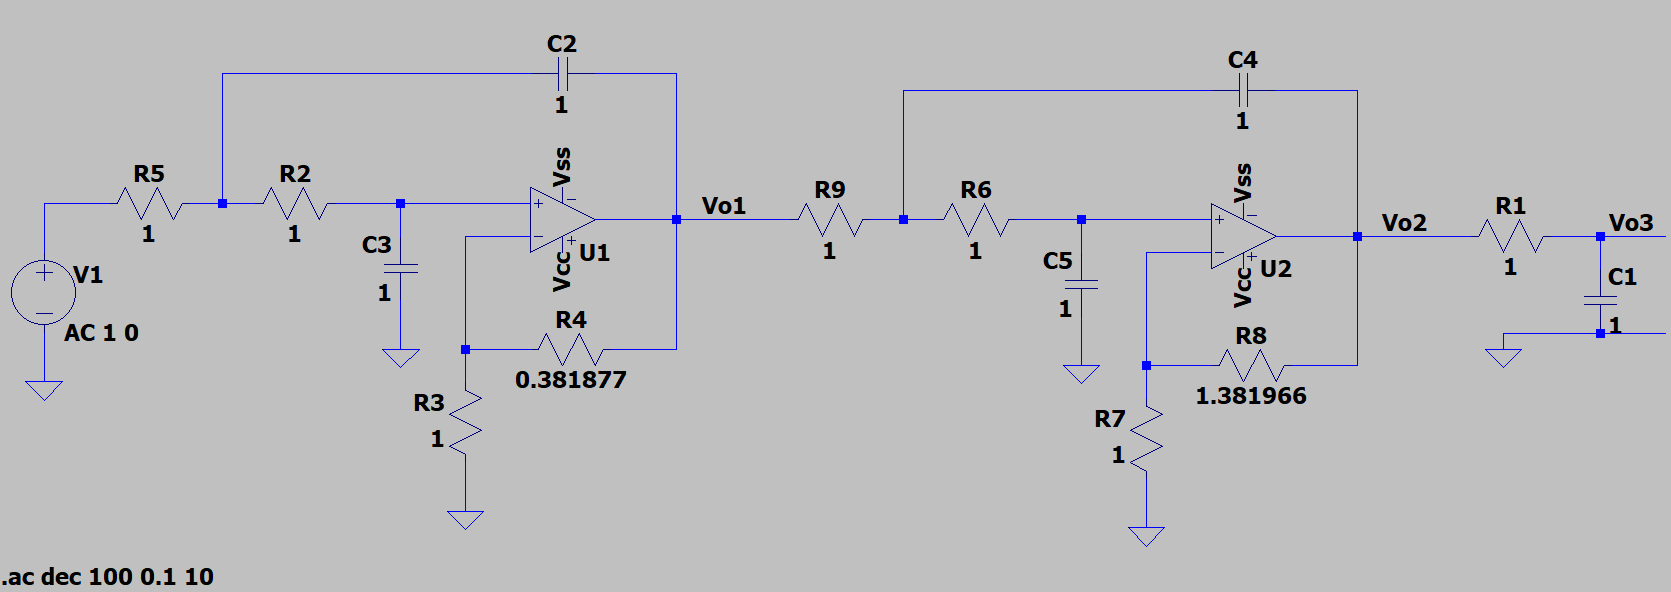

#### Desnormalizar:
$ \epsilon = 0,349 $  
$ \Omega_Z = 1k $  
$ \Omega_{W} = \epsilon^{\frac{-1}{5}} \cdot 2 \pi \cdot 1000 Hz $  
$ R_4 = \Omega_Z \cdot 0,381877 =  381,877 \Omega $  
$ R_8 = \Omega_Z \cdot 1,381966 = 1381,966 \Omega $    
$ C_1 = C_2 = C_3 = C_4 = C_5 = \frac{1}{\Omega_Z \cdot \Omega_W} = 183,492 nF $  

#### Transferencia 1

$ Q_1 = 0,618 $  
$ Q = \frac{1}{3 CR - K} $  
$ K = 3 CR - \frac{1}{Q} $  
$ K_1 = 3 CR - \frac{1}{Q_1} $  
$ K_1 = 3 1k \cdot 183,492 nF - \frac{1}{0,618} $  
$ K_1 = 1,6176 $  

$ Q_2 = 1,618 $  
$ Q = \frac{1}{3 CR - K} $  
$ K = 3 CR - \frac{1}{Q} $  
$ K_2 = 3 CR - \frac{1}{Q_2} $  
$ K_2 = 3 1k \cdot 183,492 nF - \frac{1}{1,618} $  
$ K_2 = 0,6179 $  

$ K_2 = 2 \cdot K_{divisor} $  
$  K_{divisor} = \frac{K_2}{2} $  
$  K_{divisor} = \frac{0,6179}{2} = 0,30895 $  
$ C \cdot K_{divisor} =  183,492 nF \cdot 0,30895 = 56,38 nF $  
$ C \cdot (1-K_{divisor}) =  183,492 nF \cdot (1-0,30895) = 126,8 nF $  

$ 20 dB -> 10 $ de ganancia, agrego un no inversor
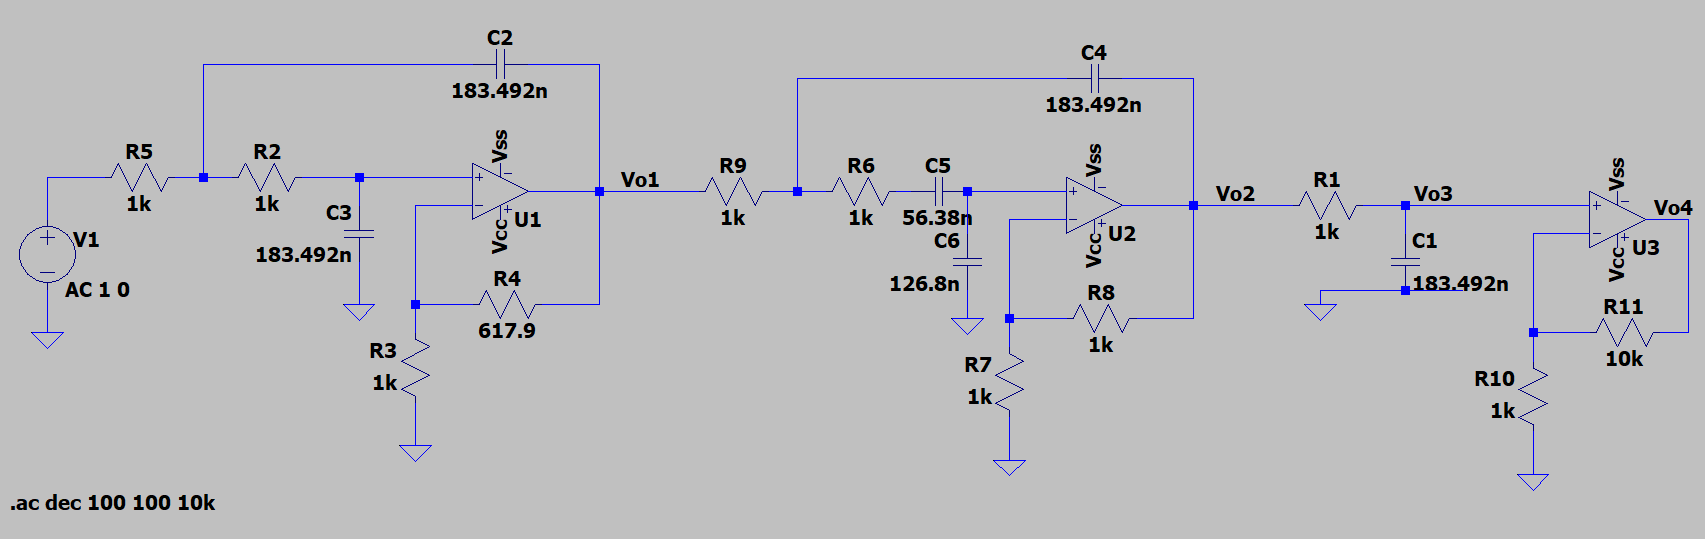
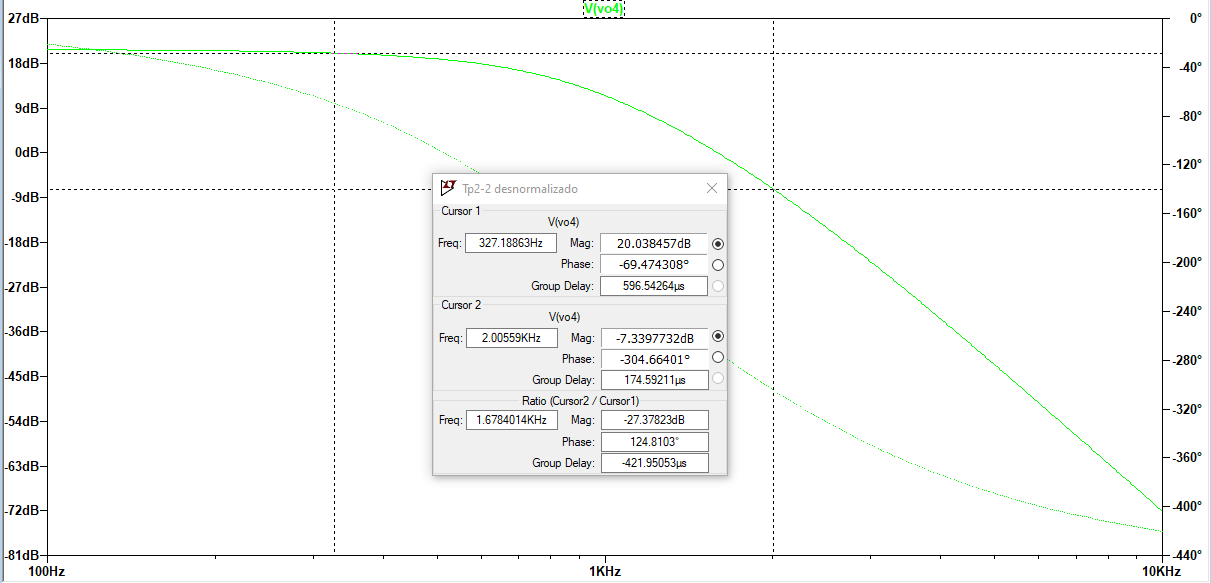